# 1. Import required Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import timedelta
plt.style.use('fivethirtyeight')


# 2. Loading  data set of historical weather data for sauida cities and make data cleaning

In [106]:
df = pd.read_csv('weather-Saudia-Arabia.csv')
df.shape

(249023, 15)

In [107]:
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  249023 non-null  int64  
 1   city        249023 non-null  object 
 2   date        249023 non-null  object 
 3   time        249023 non-null  object 
 4   year        249023 non-null  int64  
 5   month       249023 non-null  int64  
 6   day         249023 non-null  int64  
 7   hour        249023 non-null  int64  
 8   minute      249023 non-null  int64  
 9   weather     249023 non-null  object 
 10  temp        249023 non-null  int64  
 11  wind        249023 non-null  int64  
 12  humidity    249006 non-null  object 
 13  barometer   248951 non-null  float64
 14  visibility  249023 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 28.5+ MB


There are 10 Numerical columns with int and float variable and 5 Categorical variable with object datatype

### 2.1  Drop  duplicated and irrelated features

In [109]:
# date and time are duplicated features and  Unnamed: 0 is irrlevent 
deleted =['Unnamed: 0','date','time' ]
df.drop(deleted, axis =1 , inplace =True)

In [110]:
# look at data frame and replace all space cells to NULL if found

df = df.replace(" ", np.nan).replace("N/A", np.nan ).replace("NA", np.nan).replace("", np.nan)

### 2.2 convert `humidity` feature from object to Numerical and replace % by space

In [111]:
df['humidity'] = df['humidity'].str.replace('%',' ').astype('float')


In [112]:
df.isnull().sum()

city           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

as shown above there are 17 missing values in `humidity`
and 71 missing value in `barometer`

### 2.3 so , we will Deal with missing values by getting means of the humidity and barometer per each city to be replaced with missing values.

In [113]:
# display the means per city.
df.groupby(by='city')[['humidity','barometer']].mean().reset_index()

,city,humidity,barometer
0,Assir,47.590154,1023.498147
1,Baha,38.722982,1019.012376
2,EP,45.092703,1008.609077
3,Hail,41.536087,1013.528736
4,Jawf,30.500442,1015.505283
5,Jazan,45.803066,1023.087145
6,Madina,19.971600,1014.141254
7,Mecca,54.158772,1008.713919
8,Najran,45.953645,1023.093818
9,Northern boarder,26.263764,1012.641971


In [116]:
# replace the missing values with means for each city
df['humidity'] = df['humidity'].fillna(df.groupby('city')['humidity'].transform('mean'))


In [117]:
df['barometer'] = df['barometer'].fillna(df.groupby('city')['barometer'].transform('mean'))


In [118]:
df.isnull().sum()


city          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

### 2.4 Extract and create the target :  `weather feature in the dataset represents the weather conditions, which are in a text format. and multiple conditions merged together. we worked to predict the rain only, So extract the keywords rain and it's equavilaent and placed in a new column shows the result whether is rained or not raind on that day.`

In [119]:
df['weather'].unique()

array(['Clear ', 'Sunny ', 'Scattered clouds ', 'Partly sunny ',
       'Passing clouds ', 'Refreshingly cool ', 'Low level haze ',
       'Duststorm ', 'Thunderstorms  Passing clouds ', 'Fog ',
       'Thunderstorms  Partly sunny ', 'Light rain  Partly sunny ',
       'Dense fog ', 'Thunderstorms  Scattered clouds ',
       'Rain  Passing clouds ', 'Extremely hot ', 'Rain  Partly sunny ',
       'Pleasantly warm ', 'Hot ', 'Mild ', 'Overcast ',
       'Rain  Overcast ', 'Smoke ', 'Thunderstorms  Broken clouds ',
       'Heavy rain  Partly sunny ', 'Thunderstorms  Overcast ',
       'Light rain  Overcast ', 'Warm ', 'Thunderstorms  Cloudy ',
       'Drizzle  Overcast ', 'Thunderstorms  Partly cloudy ',
       'Broken clouds ', 'Sandstorm ', 'Partly cloudy ', 'Mostly cloudy ',
       'Rain  Partly cloudy ', 'Rain  Broken clouds ',
       'Rain  Scattered clouds ', 'Haze ', 'Rain  Mostly cloudy ',
       'Hail  Partly sunny ', 'Thundershowers  Passing clouds ',
       'Thunderstorms  Mor

In [120]:
# creating the target feature `rain`
df['rain'] = df['weather'].str.contains('rain|shower|thunderstorm|thundershowers', case = False ,regex=True)


In [121]:
# show a sampel
df.groupby('weather')['rain'].unique().sample(20)

weather
Rain  Sandstorm                                 [True]
Strong thunderstorms  More clouds than sun      [True]
Cloudy                                         [False]
Fog                                            [False]
Light rain  More clouds than sun                [True]
Rain  Fog                                       [True]
Thundershowers  Passing clouds                  [True]
Drizzle  Broken clouds                         [False]
Rain  Mostly cloudy                             [True]
Thundershowers  Scattered clouds                [True]
Scattered clouds                               [False]
Drizzle  Partly sunny                          [False]
Overcast                                       [False]
Pleasantly warm                                [False]
Rain  Scattered clouds                          [True]
Hail  Cloudy                                   [False]
Light rain  Partly sunny                        [True]
More clouds than sun                           [False]
Li

In [122]:
df['rain'].value_counts()

rain
False    245696
True       3327
Name: count, dtype: int64

imbalnced data where 3327 cases was rained and 245696 was not 

In [123]:
# Now we don't need weather column where we get the target feature which is rain , so we will remove the weather feature from the dataframe.
df.drop('weather', axis =1 , inplace =True)

# 3. Exploratory data analysis

### 3.1 identify outliers

In [124]:
df.loc[:,'temp':'visibility'].describe()


,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,24.722624,12.957104,37.553192,1015.454041,11.053453
std,8.880913,8.711619,23.592329,6.970366,7.053005
min,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,31.000000,19.000000,55.000000,1021.000000,16.000000
max,50.000000,163.000000,100.000000,1101.000000,161.000000


C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

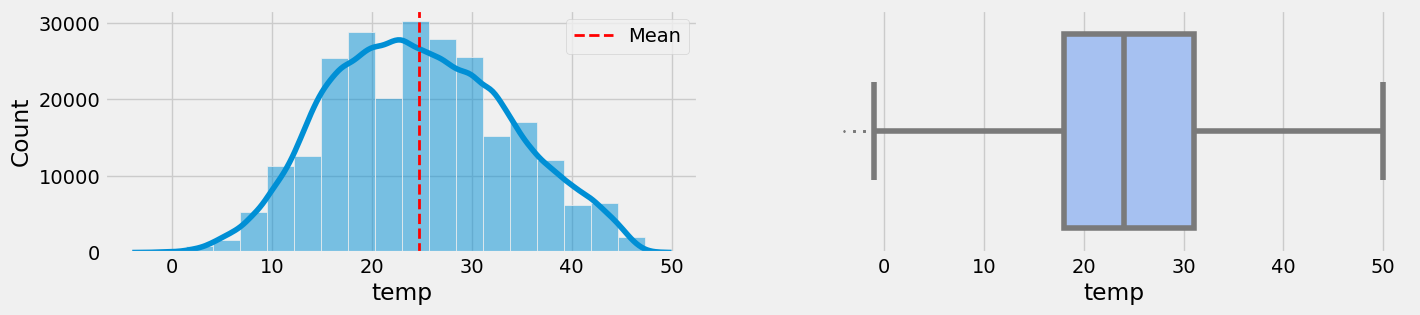

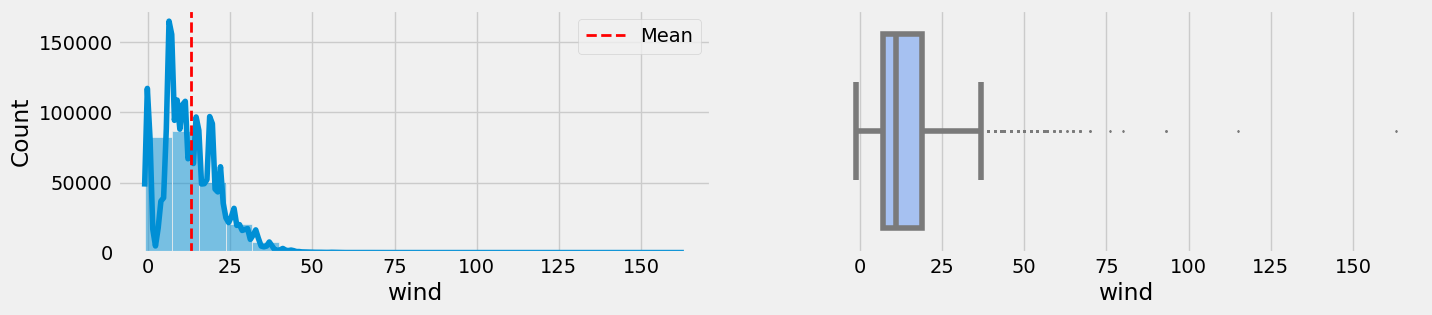

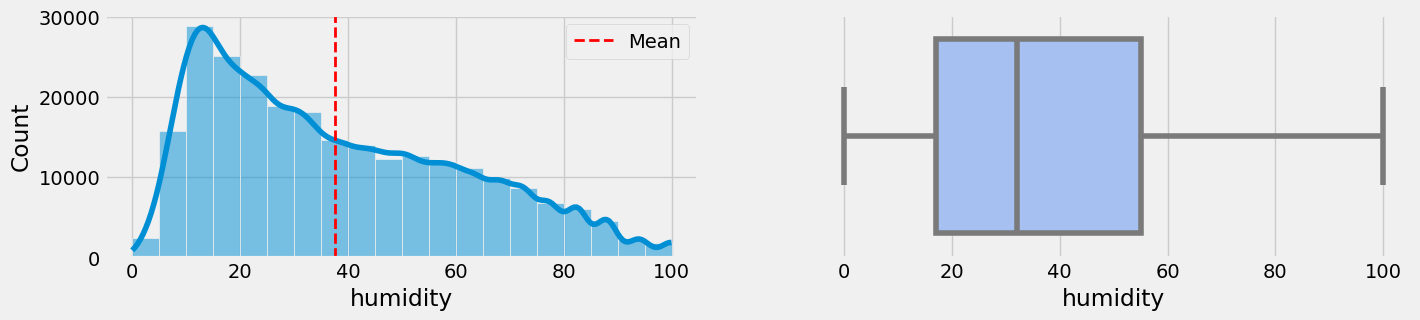

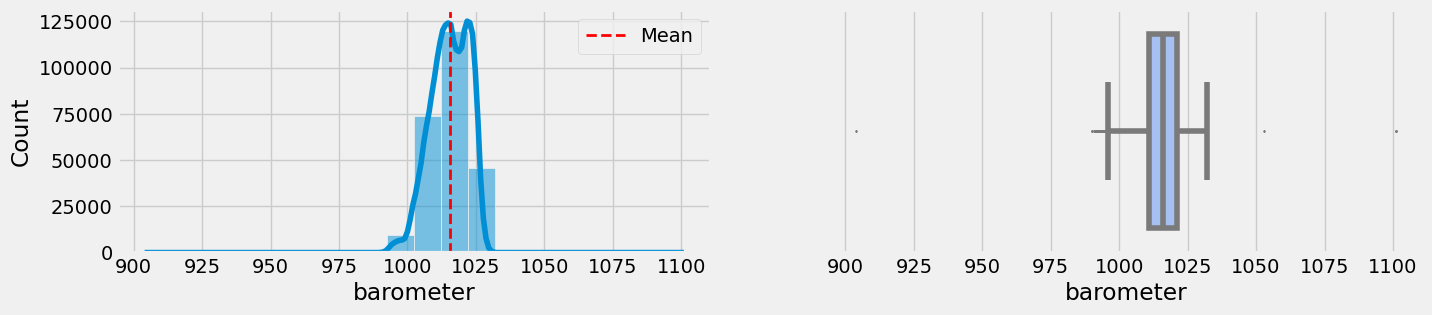

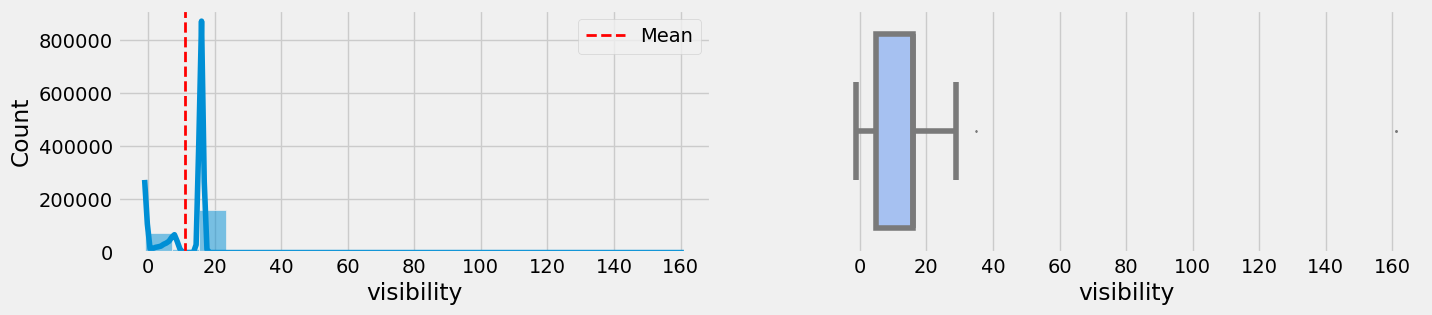

In [87]:
#get the numerical columns from Temp upt to Visibility 
# a revised list of numerical features 

num_cols=df.loc[:,'temp':'visibility'].select_dtypes(include=['int64','float64']).columns.tolist()  

#display both histogram and boxplot plots for each feature to show the outlier
for i in num_cols:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(x= df[i], ax = axs[1], color='#99befd', fliersize=1);
    axs[0].axvline(df[i].mean(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

## There are many outliers on `wind`, and small on `temp`, `visibility`, `barometer` 
## there are skewed distribution. 
## So, use interquantile range to find outliers.

In [125]:

columns = df.loc[:,'temp':'visibility'].columns
for f in columns:
    #Calculating Interquartile Range (IQR), Lower Fence Calculates the lower fence, which is 1.5 times the IQR below the first quartile., 
    #and Upper Fence, which is 1.5 times the IQR above the third quartile
    IQR = df[f].quantile(0.75) - df[f].quantile(0.25)
    Lower_fence = df[f].quantile(0.25) - (IQR * 1.5)
    Upper_fence = df[f].quantile(0.75) + (IQR * 1.5)
    print(f,' have outliers  : < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


temp  have outliers  : < -1.5 or > 50.5
wind  have outliers  : < -11.0 or > 37.0
humidity  have outliers  : < -40.0 or > 112.0
barometer  have outliers  : < 996.0 or > 1036.0
visibility  have outliers  : < -11.5 or > 32.5


In [126]:
df.head()

,city,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility,rain
0,Qassim,2017,1,1,24,0,17,11,64.0,1018.0,16,False
1,Qassim,2017,1,1,1,0,17,6,64.0,1018.0,16,False
2,Qassim,2017,1,1,3,0,15,11,72.0,1019.0,16,False
3,Qassim,2017,1,1,4,0,15,11,72.0,1019.0,16,False
4,Qassim,2017,1,1,5,0,15,9,72.0,1019.0,16,False


Lets discover patterns and relationships between variables in the dataset.

In [127]:
df_num = df.iloc[:, 1:]
correlation = df_num.corr()
correlation

,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility,rain
year,1.000000,-0.311509,-0.010175,-0.002183,-0.000084,-0.184575,0.045206,0.155731,0.088993,-0.064775,0.021736
month,-0.311509,1.000000,0.012757,-0.001278,-0.004283,0.225099,-0.100243,-0.043024,-0.052230,0.020941,0.011604
day,-0.010175,0.012757,1.000000,0.000806,-0.000638,0.021591,0.017328,-0.012094,-0.002583,-0.024035,-0.002962
hour,-0.002183,-0.001278,0.000806,1.000000,0.009323,0.211126,0.202639,-0.147632,-0.025126,-0.080893,0.035151
minute,-0.000084,-0.004283,-0.000638,0.009323,1.000000,-0.007888,0.069682,0.024913,-0.015385,-0.068198,0.173484
temp,-0.184575,0.225099,0.021591,0.211126,-0.007888,1.000000,0.238350,-0.596359,-0.681869,-0.001876,-0.048455
wind,0.045206,-0.100243,0.017328,0.202639,0.069682,0.238350,1.000000,-0.179040,-0.135054,-0.210594,0.074909
humidity,0.155731,-0.043024,-0.012094,-0.147632,0.024913,-0.596359,-0.179040,1.000000,0.290877,-0.151305,0.141816
barometer,0.088993,-0.052230,-0.002583,-0.025126,-0.015385,-0.681869,-0.135054,0.290877,1.000000,-0.033031,0.008610
visibility,-0.064775,0.020941,-0.024035,-0.080893,-0.068198,-0.001876,-0.210594,-0.151305,-0.033031,1.000000,-0.127929


There no stronge positive relationship between the features
 - `barometer` and `humidity` positively correlated with correlation coefficient = 0.29. 
 - `temp`and `month` positively correlated with correlation coefficient = 0.23. 
 - `temp`and `hours` positively correlated with correlation coefficient = 0.21.
 - `wind`and `hours` positively correlated with correlation coefficient = 0.20.
 - `temp`and `wind`  positively correlated with correlation coefficient = 0.24.

 - `temp`and `barometer`  Negatively correlated with correlation coefficient = -0.68.
 - `temp`and `humidity`  Negatively correlated with correlation coefficient = -0.60.

 Also the pattren in pairplot Illustrate the relations.
 
 

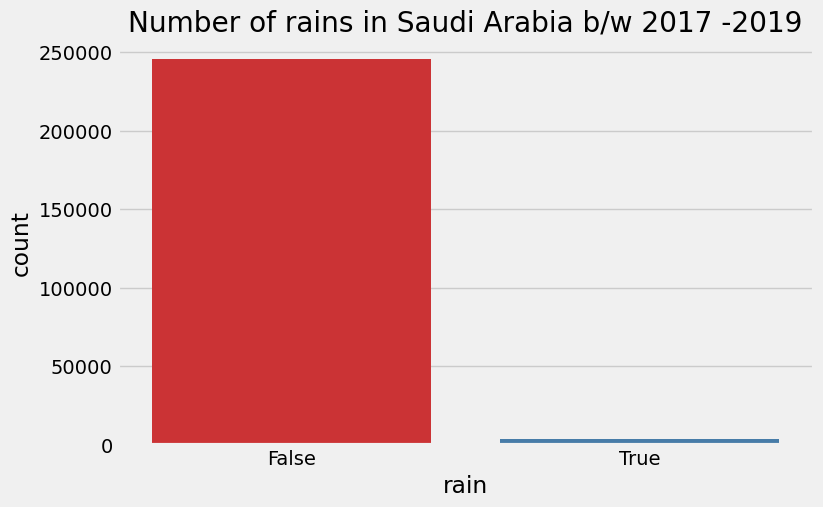

In [128]:
#check labels target
f, ax = plt.subplots(figsize=(8, 5))
plt.title('Number of rains in Saudi Arabia b/w 2017 -2019')
ax = sns.countplot(x="rain", data=df, palette="Set1")
plt.show()

dataset are not balnced to I will implement RandomUnderSampler

In [129]:
df['rain'].value_counts()

rain
False    245696
True       3327
Name: count, dtype: int64

#### 3.2 Explorering rain cross cities and years

In [130]:
city_rain_rate = pd.DataFrame(df.groupby(by=['city','year'])['rain'].sum())

In [131]:
city_rain_rate = city_rain_rate.reset_index()

C:\Users\20111\AppData\Local\Temp\ipykernel_4268\3008242709.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=city_rain_rate, x="city", y="rain", ci=None, hue="year")


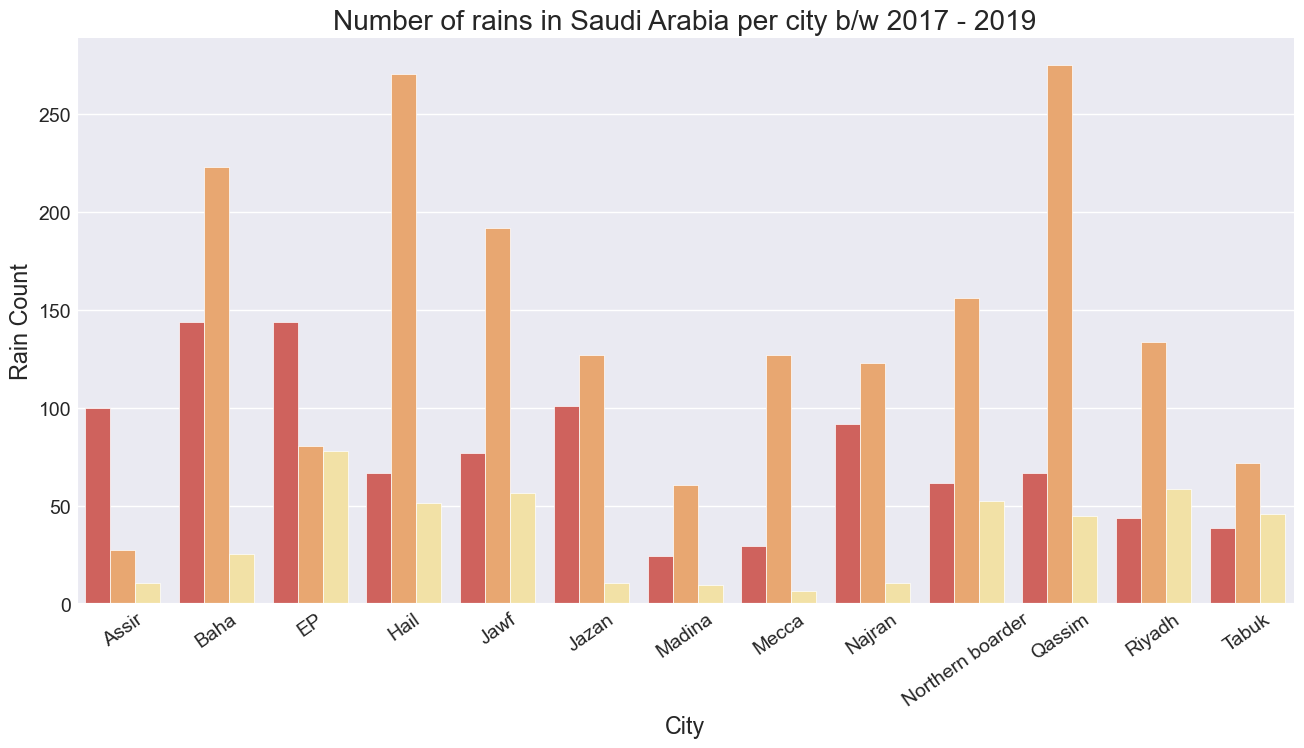

In [140]:
plt.subplots(figsize=(14, 7))

sns.set_style('darkgrid')
sns.set_palette("Spectral" )
try:
    sns.barplot(data=city_rain_rate, x="city", y="rain", ci=None, hue="year")
except:
    print()
    
plt.title('Number of rains in Saudi Arabia per city b/w 2017 - 2019')
plt.xlabel('City' )
plt.ylabel('Rain Count')
plt.xticks(rotation=35)
sns.despine()

plt.show()

this barchat shows that most of the rain was 2018 most of the time.



# 4. Features Engineering

### 4.1 Engineering outliers in numerical variables

We have seen above (3.1) that the  `wind`, `temp`, `visibility`, `barometer`  columns contain outliers. I will use IQR approach to capture maximum and minimum values and remove outliers from the above variables.

In [141]:
df.loc[:,'temp':'visibility'].describe()

,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,24.722624,12.957104,37.553192,1015.454041,11.053453
std,8.880913,8.711619,23.592329,6.970366,7.053005
min,-4.000000,-1.000000,0.000000,904.000000,-1.000000
25%,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,31.000000,19.000000,55.000000,1021.000000,16.000000
max,50.000000,163.000000,100.000000,1101.000000,161.000000


In [142]:
# setting the outliers to max or min value 
df['temp'] = np.where(df['temp']<-1.5 , -1.5 , df['temp'])
df['wind'] = np.where(df['wind']>37.0, 37.0, df['wind'])
df['wind'] = np.where(df['wind']<0, 0, df['wind'])
df['visibility'] = np.where(df['visibility']>32.5, 32.5, df['visibility'])
df['visibility'] = np.where(df['visibility']<0, 0, df['visibility'])
df['barometer'] = np.where(df['barometer']>1036.0, 1036.0, df['barometer'])
df['barometer'] = np.where(df['barometer']<996.0 , 996.0 , df['barometer'])

In [143]:
df.loc[:,'temp':'visibility'].describe()

,temp,wind,humidity,barometer,visibility
count,249023.000000,249023.000000,249023.000000,249023.000000,249023.000000
mean,24.722690,12.905406,37.553192,1015.463815,11.251766
std,8.880712,8.529225,23.592329,6.932857,6.702366
min,-1.500000,0.000000,0.000000,996.000000,0.000000
25%,18.000000,7.000000,17.000000,1011.000000,5.000000
50%,24.000000,11.000000,32.000000,1016.000000,16.000000
75%,31.000000,19.000000,55.000000,1021.000000,16.000000
max,50.000000,37.000000,100.000000,1036.000000,32.500000


C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\20111\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

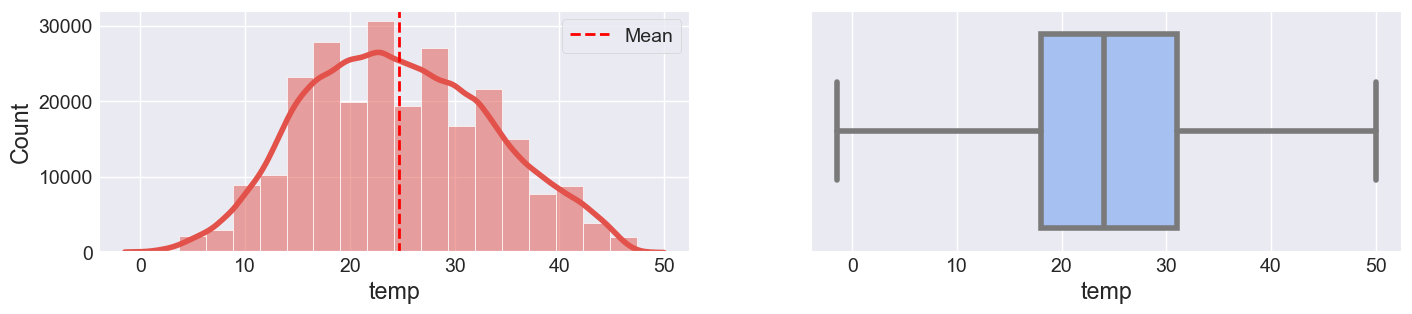

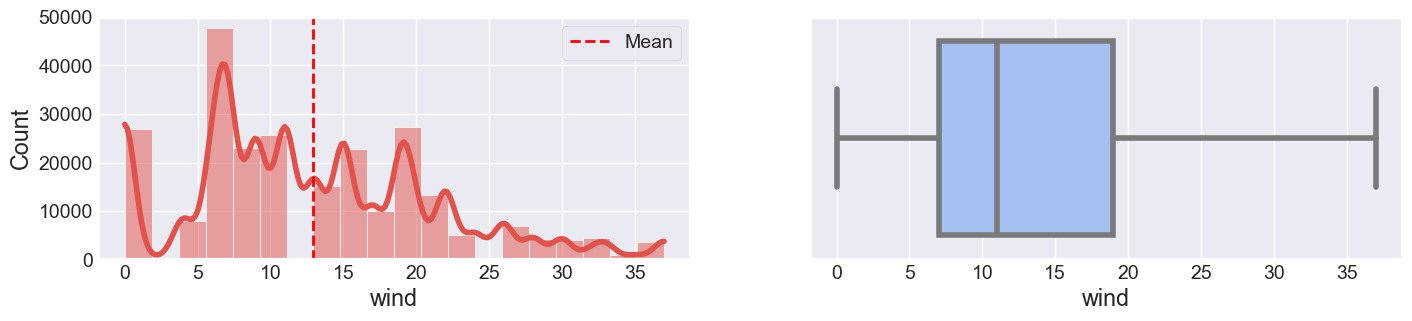

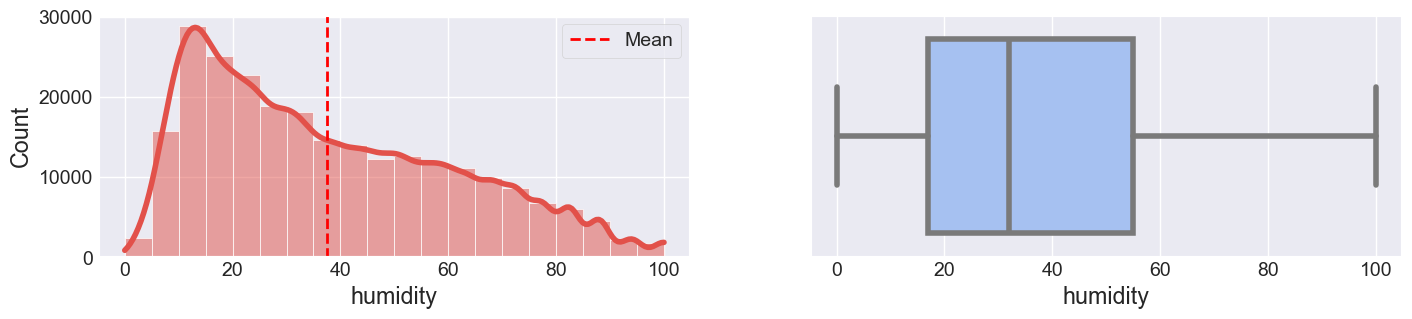

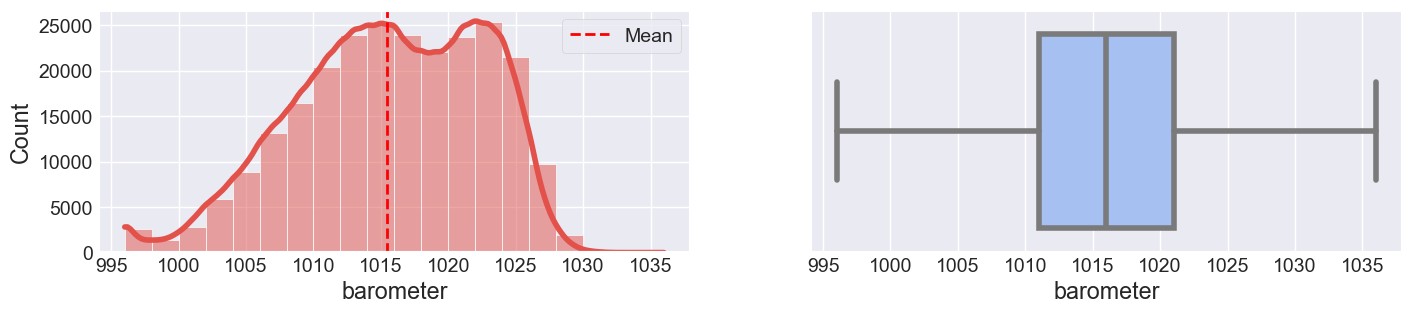

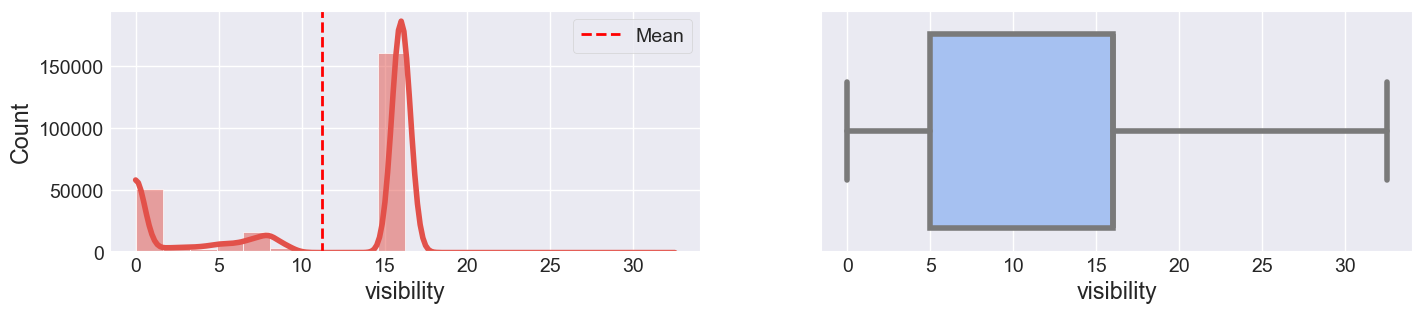

In [144]:
num_cols=df.loc[:,'temp':'visibility'].select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  

for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(x= df[i], ax = axs[1], color='#99befd', fliersize=1);
    
    axs[0].axvline(df[i].mean(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

Apply one HostEncoding to the city variables

In [145]:
c = pd.get_dummies(df['city'], drop_first=True)

df  = pd.concat([c,df], axis=1 )

In [146]:
df.drop('city' , axis =1 , inplace= True)

In [147]:
df.head()

,Baha,EP,Hail,Jawf,Jazan,Madina,Mecca,Najran,Northern boarder,Qassim,...,month,day,hour,minute,temp,wind,humidity,barometer,visibility,rain
0,False,False,False,False,False,False,False,False,False,True,...,1,1,24,0,17.0,11.0,64.0,1018.0,16.0,False
1,False,False,False,False,False,False,False,False,False,True,...,1,1,1,0,17.0,6.0,64.0,1018.0,16.0,False
2,False,False,False,False,False,False,False,False,False,True,...,1,1,3,0,15.0,11.0,72.0,1019.0,16.0,False
3,False,False,False,False,False,False,False,False,False,True,...,1,1,4,0,15.0,11.0,72.0,1019.0,16.0,False
4,False,False,False,False,False,False,False,False,False,True,...,1,1,5,0,15.0,9.0,72.0,1019.0,16.0,False


### 4.1  Deal with imbalanced

In [148]:
df['rain'].value_counts()

rain
False    245696
True       3327
Name: count, dtype: int64

In [149]:
X = df.drop(['rain'], axis=1)
y = df['rain']

In [151]:
from imblearn.over_sampling import SMOTE

In [152]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [153]:
# df_resampled just for visualiation
df_resampled = pd.concat([X,y], axis =1)

In [154]:
df_resampled['rain'].value_counts()

rain
False    245696
True     245696
Name: count, dtype: int64

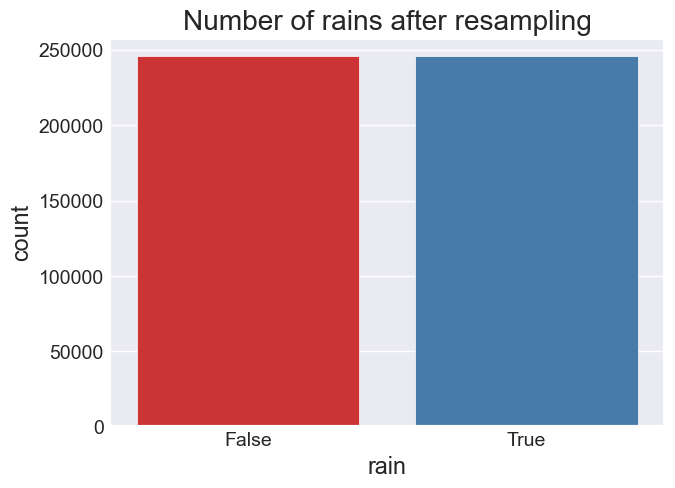

In [157]:
#just to just to illustrate the difference
plt.title('Number of rains after resampling')
ax = sns.countplot(x="rain", data=df_resampled, palette="Set1")
plt.show()

SMOTE has balanced my data equaly with 245696 in each label.

### 4.2 Feature Scaling

In [158]:
# first lets split to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [160]:
X_train.shape , X_test.shape

((393113, 22), (98279, 22))

# 5. Model

### 5.1 logistic regression model



In [161]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
lg = LogisticRegression(solver= 'liblinear', C=1000)

# fit the model
lg.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [162]:
# predict the test set
y_pred_lg = lg.predict(X_test)

In [163]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lg)))
print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))

Model accuracy score: 0.8997
Training set score: 0.8993


In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

       False       0.90      0.90      0.90     48973
        True       0.90      0.90      0.90     49306

    accuracy                           0.90     98279
   macro avg       0.90      0.90      0.90     98279
weighted avg       0.90      0.90      0.90     98279



### Confusing Matrix on logistic regression model

In [165]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lg)
lg_cm = pd.DataFrame(cm)
lg_score = accuracy_score(y_test, y_pred_lg)

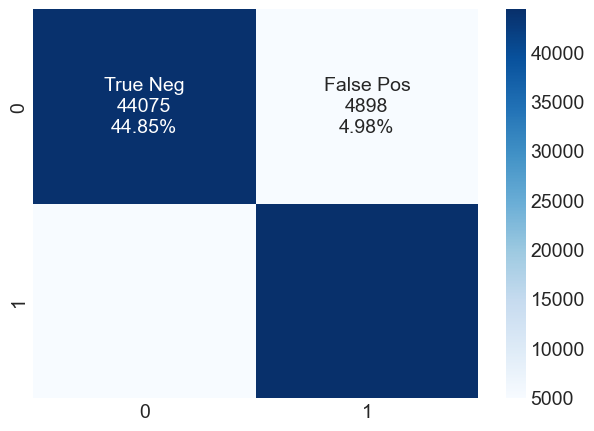

In [166]:
# visualisng confusing matrix
def vcm(cm):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

vcm(cm)